In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# Sample knowledge graph data
data = [('dog', 'isa', 'mammal'),  ('cat', 'isa', 'mammal'),
        ('mammal', 'isa', 'animal'), ('fffish', 'isa', 'animal'), 
           ('shark', 'isa', 'fish'), #('tuna', 'isa', 'fish'),
           ('animal', 'isa', 'living_thing'),  #('bacteria', 'isa', 'living_thing'),
          #('fungi', 'isa', 'living_thing'),  #('plant', 'isa', 'living_thing'), 
          ('tree', 'isa', 'plant'),  #('grass', 'isa', 'plant')]
]

# data = [
#     ('France', 'capitalCity', 'Paris'),
#     ('Germany', 'capitalCity', 'Berlin'),
#     ('Italy', 'capitalCity', 'Rome'),
#     ('Spain', 'capitalCity', 'Madrid'),
#     ('United Kingdom', 'capitalCity', 'London'),

#     ('Paris', 'cityLocatedInCountry', 'France'),
#     ('Berlin', 'cityLocatedInCountry', 'Germany'),
#     ('Rome', 'cityLocatedInCountry', 'Italy'),
#     ('Madrid', 'cityLocatedInCountry', 'Spain'),
#     ('London', 'cityLocatedInCountry', 'United Kingdom'),

#     ('France', 'neighboringCountry', 'Germany'),
#     ('France', 'neighboringCountry', 'Italy'),
#     ('France', 'neighboringCountry', 'Spain'),
#     ('Germany', 'neighboringCountry', 'France'),
#     ('Germany', 'neighboringCountry', 'Italy'),
#     ('Italy', 'neighboringCountry', 'France'),
#     ('Italy', 'neighboringCountry', 'Germany'),
#     ('Italy', 'neighboringCountry', 'Spain'),
#     ('Spain', 'neighboringCountry', 'France'),
#     ('Spain', 'neighboringCountry', 'Italy'),

#     ('Berlin', 'cityLocatedInCountry', 'Germany'),
#     ('Paris', 'cityLocatedInCountry', 'France'),
#     ('London', 'cityLocatedInCountry', 'United Kingdom'),
#     ('Rome', 'cityLocatedInCountry', 'Italy'),
#     ('Madrid', 'cityLocatedInCountry', 'Spain'),

#     ('France', 'memberOf', 'EuropeanUnion'),
#     ('Germany', 'memberOf', 'EuropeanUnion'),
#     ('Italy', 'memberOf', 'EuropeanUnion'),
#     ('Spain', 'memberOf', 'EuropeanUnion'),
#     ('United Kingdom', 'memberOf', 'EuropeanUnion'),
# ]

# Define the entity and relation dictionaries
entities = set([item for triple in data for item in triple[::2]])
relations = set([item for triple in data for item in triple[1:2]])
entity_dict = {entity: idx for idx, entity in enumerate(entities)}
relation_dict = {relation: idx for idx, relation in enumerate(relations)}

# Create the training data
heads, rr, tails = [], [], []
for h, r, t in data:
    heads.append(entity_dict[h])
    rr.append(relation_dict[r])
    tails.append(entity_dict[t])

heads = torch.LongTensor(heads)
rr = torch.LongTensor(rr)
tails = torch.LongTensor(tails)

idx1 = torch.randperm(heads.shape[0])

In [58]:
# Define the vanilla TransE model
class TransE(nn.Module):
    def __init__(self, num_entities, num_relations, embedding_dim):
        super(TransE, self).__init__()
        self.embedding_dim = embedding_dim
        self.entity_embeddings = nn.Embedding(num_entities, embedding_dim)
        self.relation_embeddings = nn.Embedding(num_relations, embedding_dim)

    def forward(self, heads, relations, tails):
        head_embeddings = self.entity_embeddings(heads)
        relation_embeddings = self.relation_embeddings(relations)
        tail_embeddings = self.entity_embeddings(tails)

        loss = head_embeddings + relation_embeddings - tail_embeddings
        loss = torch.norm(loss, p=2, dim=1)  # Compute the L2 norm

        return torch.mean(loss)

# Initialize the TransE model
model = TransE(len(entities), len(rr), embedding_dim=2)
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
epochs = 20000
for epoch in range(epochs):
    optimizer.zero_grad()
    loss = model(heads, rr, tails)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1}, Loss: {loss.item():.4f}")

Epoch: 1000, Loss: 1.8085
Epoch: 2000, Loss: 1.3300
Epoch: 3000, Loss: 1.0245
Epoch: 4000, Loss: 0.8598
Epoch: 5000, Loss: 0.7143
Epoch: 6000, Loss: 0.5938
Epoch: 7000, Loss: 0.4979
Epoch: 8000, Loss: 0.4220
Epoch: 9000, Loss: 0.3483
Epoch: 10000, Loss: 0.2759
Epoch: 11000, Loss: 0.2290
Epoch: 12000, Loss: 0.1983
Epoch: 13000, Loss: 0.1681
Epoch: 14000, Loss: 0.1381
Epoch: 15000, Loss: 0.1088
Epoch: 16000, Loss: 0.0830
Epoch: 17000, Loss: 0.0573
Epoch: 18000, Loss: 0.0315
Epoch: 19000, Loss: 0.0058
Epoch: 20000, Loss: 0.0006


# visualize 

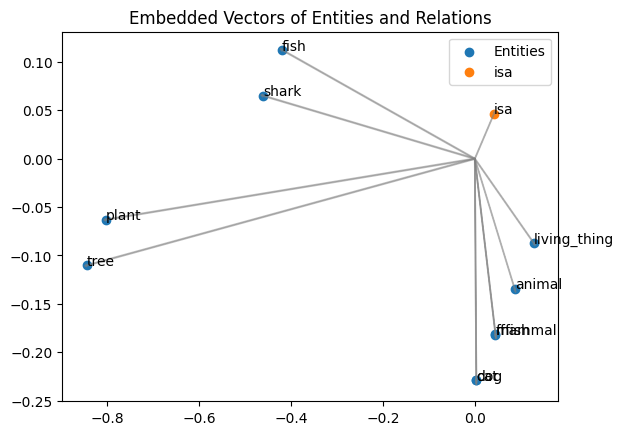

In [59]:
# Get the entity and relation embeddings
entity_embeddings = model.entity_embeddings.weight.data
relation_embeddings = model.relation_embeddings.weight.data

# Get the entity and relation embeddings
entity_embeddings = model.entity_embeddings.weight.data
relation_embeddings = model.relation_embeddings.weight.data

# Extract x and y coordinates for entities
entity_x = entity_embeddings[:, 0].numpy()
entity_y = entity_embeddings[:, 1].numpy()

# Extract x and y coordinates for relations
relation_x = relation_embeddings[:, 0].numpy()
relation_y = relation_embeddings[:, 1].numpy()

# Create a scatter plot for entities
plt.scatter(entity_x, entity_y, label='Entities')

# Create a scatter plot for relations with labels
for i, relation in enumerate(relations):
    plt.scatter(relation_x[i], relation_y[i], label=relation)
    plt.annotate(relation, (relation_x[i], relation_y[i]))

# Add labels to the scatter plot for entities
for i, entity in enumerate(entities):
    plt.annotate(entity, (entity_x[i], entity_y[i]))

# Add vector arrows from the origin
for i in range(len(entities)):
    plt.arrow(0, 0, entity_x[i], entity_y[i], color='gray', alpha=0.5)
for i in range(len(relations)):
    plt.arrow(0, 0, relation_x[i], relation_y[i], color='gray', alpha=0.5)
              
# plt.quiver(0, 0, entity_x, entity_y, angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.5, label='Entities')
# plt.quiver(0, 0, relation_x, relation_y, angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.5, label='Relations')

# Add legend and title to the plot
plt.legend()
plt.title('Embedded Vectors of Entities and Relations')

# Show the plot
plt.show()


# Improvement: Adding negative samples in the loss

TODO: Need to improve when getting negative samples
Currently, it doesn't work

In [72]:
# Define the vanilla TransE model
class TransE(nn.Module):
    def __init__(self, num_entities, num_relations, embedding_dim):
        super(TransE, self).__init__()
        self.embedding_dim = embedding_dim
        self.entity_embeddings = nn.Embedding(num_entities, embedding_dim)
        self.relation_embeddings = nn.Embedding(num_relations, embedding_dim)

    def forward(self, heads, relations, tails, gamma=0.1):
        head_embeddings = self.entity_embeddings(heads)
        relation_embeddings = self.relation_embeddings(relations)
        tail_embeddings = self.entity_embeddings(tails)

        # for simplicity, negative samples are ~heards, relations, ~tails
        # random permutation of head_embeddings is:

        # in python, how to get a random permutation of a tensor?        
        idx1 = torch.randperm(head_embeddings.shape[0])
        # idx2 = torch.randperm(head_embeddings.shape[0])
        # head_embeddings_neg = head_embeddings[idx1,:]
        # tail_embeddings_neg = tail_embeddings[idx1,:]

        loss_pos = head_embeddings + relation_embeddings - tail_embeddings
        loss_pos = torch.norm(loss_pos, p=2, dim=1) 
        
        loss_neg = tail_embeddings + relation_embeddings - head_embeddings
        # loss_neg = tail_embeddings_neg + relation_embeddings - head_embeddings_neg
        loss_neg = torch.norm(loss_neg, p=2, dim=1) 

        hinge_loss = torch.max(loss_pos - loss_neg + gamma, torch.tensor(0.0))
        return torch.mean(hinge_loss)

# Initialize the TransE model
model = TransE(len(entities), len(rr), embedding_dim=2)
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 30000
# Training loop
for epoch in range(epochs):
    optimizer.zero_grad()
    loss = model(heads, rr, tails, 0.0001)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1}, Loss: {loss.item():.4f}")

Epoch: 1000, Loss: 0.0000
Epoch: 2000, Loss: 0.0000
Epoch: 3000, Loss: 0.0000
Epoch: 4000, Loss: 0.0000
Epoch: 5000, Loss: 0.0000
Epoch: 6000, Loss: 0.0000
Epoch: 7000, Loss: 0.0000
Epoch: 8000, Loss: 0.0000
Epoch: 9000, Loss: 0.0000
Epoch: 10000, Loss: 0.0000
Epoch: 11000, Loss: 0.0000
Epoch: 12000, Loss: 0.0000
Epoch: 13000, Loss: 0.0000
Epoch: 14000, Loss: 0.0000
Epoch: 15000, Loss: 0.0000
Epoch: 16000, Loss: 0.0000
Epoch: 17000, Loss: 0.0000
Epoch: 18000, Loss: 0.0000
Epoch: 19000, Loss: 0.0000
Epoch: 20000, Loss: 0.0000
Epoch: 21000, Loss: 0.0000
Epoch: 22000, Loss: 0.0000
Epoch: 23000, Loss: 0.0000
Epoch: 24000, Loss: 0.0000
Epoch: 25000, Loss: 0.0000
Epoch: 26000, Loss: 0.0000
Epoch: 27000, Loss: 0.0000
Epoch: 28000, Loss: 0.0000
Epoch: 29000, Loss: 0.0000
Epoch: 30000, Loss: 0.0000


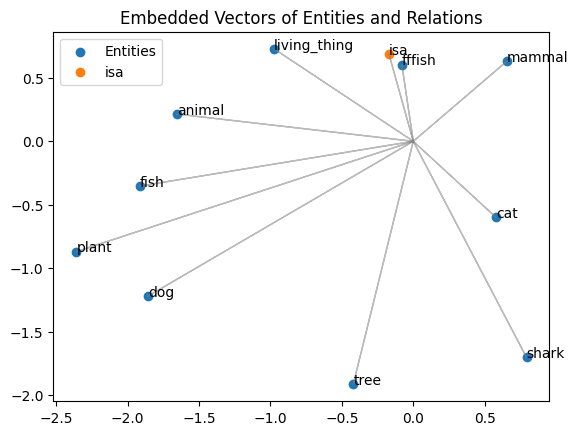

In [73]:
# Get the entity and relation embeddings
entity_embeddings = model.entity_embeddings.weight.data
relation_embeddings = model.relation_embeddings.weight.data

# Get the entity and relation embeddings
entity_embeddings = model.entity_embeddings.weight.data
relation_embeddings = model.relation_embeddings.weight.data

# Extract x and y coordinates for entities
entity_x = entity_embeddings[:, 0].numpy()
entity_y = entity_embeddings[:, 1].numpy()

# Extract x and y coordinates for relations
relation_x = relation_embeddings[:, 0].numpy()
relation_y = relation_embeddings[:, 1].numpy()

# Create a scatter plot for entities
plt.scatter(entity_x, entity_y, label='Entities')

# Create a scatter plot for relations with labels
for i, relation in enumerate(relations):
    plt.scatter(relation_x[i], relation_y[i], label=relation)
    plt.annotate(relation, (relation_x[i], relation_y[i]))

# Add labels to the scatter plot for entities
for i, entity in enumerate(entities):
    plt.annotate(entity, (entity_x[i], entity_y[i]))

# Add vector arrows from the origin
for i in range(len(entities)):
    plt.arrow(0, 0, entity_x[i], entity_y[i], color='gray', alpha=0.5)
for i in range(len(relations)):
    plt.arrow(0, 0, relation_x[i], relation_y[i], color='gray', alpha=0.5)
              
# plt.quiver(0, 0, entity_x, entity_y, angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.5, label='Entities')
# plt.quiver(0, 0, relation_x, relation_y, angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.5, label='Relations')

# Add legend and title to the plot
plt.legend()
plt.title('Embedded Vectors of Entities and Relations')

# Show the plot
plt.show()
